In [439]:
import numpy as np
import pandas as pd
import datetime

#### Reading the data

In [440]:
df=pd.read_csv('netflix.csv')

In [441]:
df_og=df.copy()

In [442]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Preprocessing

In [444]:
#The columns director,cast,listed_in,country has comma seprated data which will be an issue when we do grouping.

In [445]:
#making df_cast to fix this issue for cast
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_cast=pd.DataFrame(constraint,index=df['title'])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']

In [446]:
#making df_director to fix this issue for director
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_director=pd.DataFrame(constraint,index=df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']

In [447]:
#making df_listed_in to fix this issue for listed_in
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_listed_in=pd.DataFrame(constraint,index=df['title'])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace=True)
df_listed_in=df_listed_in[['title',0]]
df_listed_in.columns=['title','listed_in']

In [448]:
#making df_country to fix this issue for country
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(constraint,index=df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']

In [449]:
#merging all these dataframes

In [450]:
df_res=df_cast.merge(df_director,on='title')
df_res=df_res.merge(df_listed_in,on='title')
df_res=df_res.merge(df_country,on='title')

In [451]:
df_res

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [452]:
df.drop(['cast','director','listed_in','country'],axis=1,inplace=True)

In [453]:
df=df_res.merge(df,on='title')

In [454]:
df

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [455]:
df.replace('nan',np.nan,inplace=True)

In [456]:
df

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201991 non-null  object
 1   cast          199845 non-null  object
 2   director      151348 non-null  object
 3   listed_in     201991 non-null  object
 4   country       190094 non-null  object
 5   show_id       201991 non-null  object
 6   type          201991 non-null  object
 7   date_added    201833 non-null  object
 8   release_year  201991 non-null  int64 
 9   rating        201924 non-null  object
 10  duration      201988 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


#### Fixing Null values in the data

In [458]:
'''
Approach:

Columns with null values: cast,director,country,rating,date_added

Taking mode directly for columns like cast,director will not be appropiate as these columns represent
names.

1. Filling the null values in country column with mode of country.
2. Grouping by country and taking the mode of directors of each group and filling the director's column with 
most popular director in the country.
3. Grouping by director and taking the mode of cast of each group and filling the cast's column.
4. Droping the rows for rating and date_added as they have very less null values and there is no direct way to treat
these nulls.

'''

"\nApproach:\n\nColumns with null values: cast,director,country,rating,date_added\n\nTaking mode directly for columns like cast,director will not be appropiate as these columns represent\nnames.\n\n1. Filling the null values in country column with mode of country.\n2. Grouping by country and taking the mode of directors of each group and filling the director's column with \nmost popular director in the country.\n3. Grouping by director and taking the mode of cast of each group and filling the cast's column.\n4. Droping the rows for rating and date_added as they have very less null values and there is no direct way to treat\nthese nulls.\n\n"

In [459]:
#filling country column with mode
df['country']=df['country'].fillna(df['country'].mode()[0])

In [460]:
df['director'].isna().sum()

50643

In [461]:
def fun_director(group):
    group['director'].fillna('not ava',inplace=True)
    val_list=group['director'].value_counts().sort_values(ascending=False).index
    val=val_list[0]
    if(len(val_list)>1 and val_list[0]=='not ava'):
        val=val_list[1]
    group['director'].replace('not ava',val,inplace=True)
    return group

In [462]:
df_1=df.groupby('country').apply(fun_director)

In [463]:
drop_idx=df_1.loc[df_1['director']=='not ava'].index
df_1.drop(drop_idx,inplace=True)

In [464]:
def fun_cast(group):
    group['cast'].fillna('not ava',inplace=True)
    val_list=group['cast'].value_counts().sort_values(ascending=False).index
    val=val_list[0]
    if(len(val_list)>1 and val_list[0]=='not ava'):
        val=val_list[1]
    group['cast'].replace('not ava',val,inplace=True)
    return group

In [465]:
df_1=df_1.groupby('director').apply(fun_cast)

In [466]:
drop_idx=df_1.loc[df_1['cast']=='not ava'].index
df_1.drop(drop_idx,inplace=True)

In [467]:
df_1.isna().sum()

title             0
cast              0
director          0
listed_in         0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [468]:
df_1.dropna(inplace=True)

#### Value counts and unique values / Univariate analysis for updated data

In [469]:
print(df_1['title'].value_counts(), "\n\n no of unique values", df_1['title'].nunique())

Kahlil Gibran's The Prophet                      700
Holidays                                         504
Movie 43                                         468
The Eddy                                         416
Narcos                                           378
                                                ... 
Peter and the Farm                                 1
Trotro                                             1
George Lopez: We'll Do It For Half                 1
Perfect Bid: The Contestant Who Knew Too Much      1
Marc Maron: Too Real                               1
Name: title, Length: 8411, dtype: int64 

 no of unique values 8411


In [470]:
print(df_1['cast'].value_counts(), "\n\n no of unique values", df_1['cast'].nunique())

Fortune Feimster      456
David Attenborough    212
Anupam Kher           167
Liam Neeson           161
Alfred Molina         160
                     ... 
Andrew Coghlan          1
Laura Mitchell          1
Elinet Louicius         1
Howard Stern            1
Ryan Baumann            1
Name: cast, Length: 36389, dtype: int64 

 no of unique values 36389


In [471]:
print(df_1['director'].value_counts(), "\n\n no of unique values", df_1['director'].nunique())

Martin Scorsese      18338
Toshiya Shinohara     4966
Sarah Smith           3986
Bong Joon Ho          3674
Robert Vince          2292
                     ...  
Michelle Esrick          1
Colin Dench              1
Mario Rouleau            1
Jeannie Gaffigan         1
Paul M. Green            1
Name: director, Length: 4528, dtype: int64 

 no of unique values 4528


In [472]:
print(df_1['listed_in'].value_counts(), "\n\n no of unique values", df_1['listed_in'].nunique())

Dramas                          29762
International Movies            27931
Comedies                        20826
International TV Shows          12766
Action & Adventure              12211
Independent Movies               9834
Children & Family Movies         9753
TV Dramas                        8922
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4897
Crime TV Shows                   4672
Horror Movies                    4568
Kids' TV                         4544
Sci-Fi & Fantasy                 4025
Music & Musicals                 3038
Romantic TV Shows                3037
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2095
Documentaries                    1836
British TV Shows                 1793
Sports Movies                    1468
Classic Movies                   1431
TV Mysteries                     1279
Korean TV Shows                  1122
Cult Movies 

In [473]:
print(df_1['type'].value_counts(), "\n\n no of unique values", df_1['type'].nunique())

Movie      144787
TV Show     55670
Name: type, dtype: int64 

 no of unique values 2


In [474]:
print(df_1['release_year'].value_counts(), "\n\n no of unique values", df_1['release_year'].nunique())

2018    24259
2019    21741
2017    20288
2020    19552
2016    18247
        ...  
1947        8
1942        6
1943        4
1946        2
1925        1
Name: release_year, Length: 74, dtype: int64 

 no of unique values 74


In [475]:
print(df_1['rating'].value_counts(), "\n\n no of unique values", df_1['rating'].nunique())

TV-MA       73308
TV-14       43534
R           25852
PG-13       16207
TV-PG       14692
PG          10908
TV-Y7        6285
TV-Y         3637
TV-G         2709
G            1528
NR           1476
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64 

 no of unique values 14


#### Value counts and unique values / Univariate for updated data

In [476]:
print(df_og['title'].value_counts(), "\n\n no of unique values", df_og['title'].nunique())

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64 

 no of unique values 8807


In [477]:
print(df_og['cast'].value_counts(), "\n\n no of unique values", df_og['cast'].nunique())


David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [478]:
print(df_og['director'].value_counts(), "\n\n no of unique values", df_og['director'].nunique())


Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64 

 no of unique values 4528


In [479]:
print(df_og['listed_in'].value_counts(), "\n\n no of unique values", df_og['listed_in'].nunique())


Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64 

 no of unique values 514


In [480]:
print(df_og['type'].value_counts(), "\n\n no of unique values", df_og['type'].nunique())


Movie      6131
TV Show    2676
Name: type, dtype: int64 

 no of unique values 2


In [481]:
print(df_og['release_year'].value_counts(), "\n\n no of unique values", df_og['release_year'].nunique())


2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64 

 no of unique values 74


In [482]:
print(df_og['rating'].value_counts(), "\n\n no of unique values", df_og['rating'].nunique())


TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64 

 no of unique values 17


In [483]:
df.head()

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


### Visual Analysis

Univariate

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


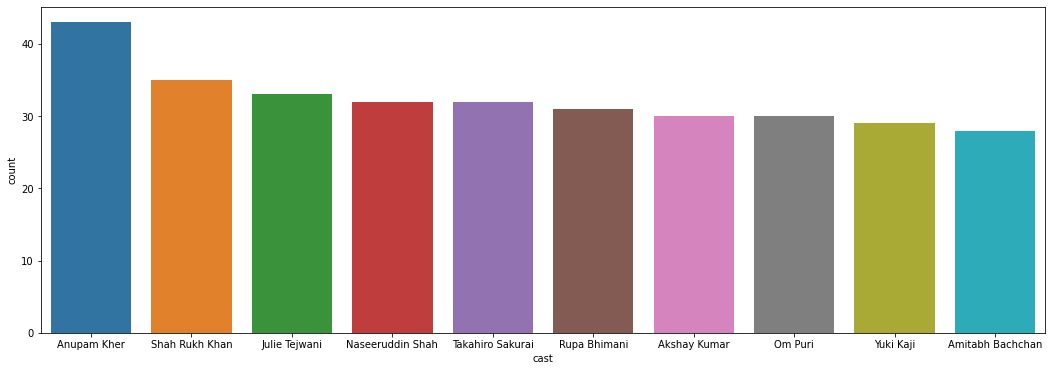

In [485]:
# Top 10 actors who did most movies/tv shows
fig,ax = plt.subplots(figsize=(18, 6))
sns.countplot(df_cast['cast'],order=df_cast['cast'].value_counts().iloc[1:11].index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


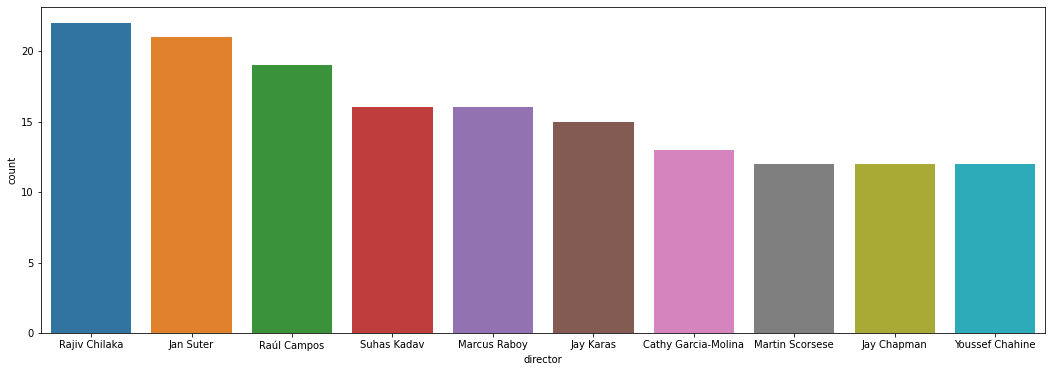

In [486]:
# Top 10 directors who did most movies/tv shows
fig,ax = plt.subplots(figsize=(18, 6))
sns.countplot(df_director['director'],order=df_director['director'].value_counts().iloc[1:11].index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


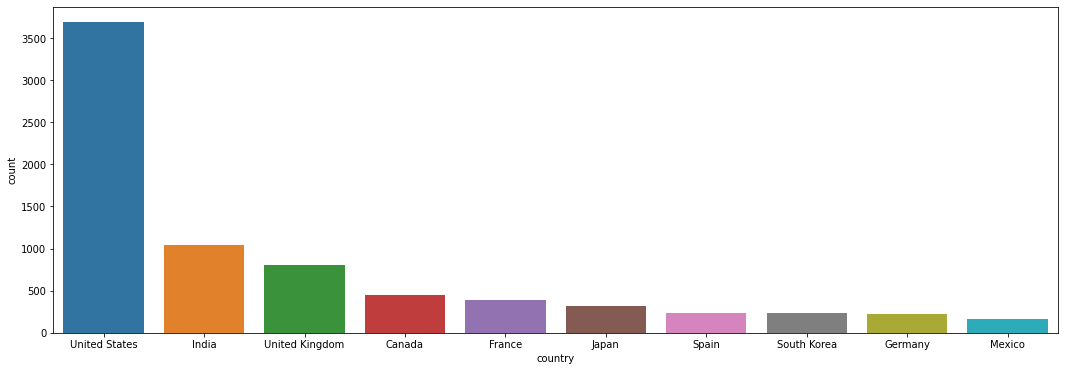

In [487]:
# Top 10 counries by total movies/tv shows
fig,ax = plt.subplots(figsize=(18, 6))
df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_country_no_na['country'],order=df_country_no_na['country'].value_counts().iloc[:10].index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


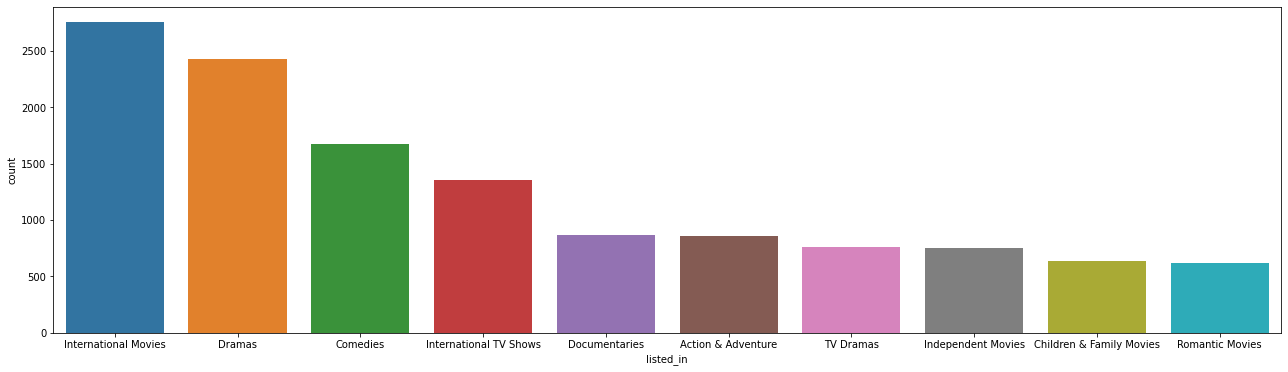

In [488]:
# Top 10 slots where movies/tv shows were listed
fig,ax = plt.subplots(figsize=(22, 6))
# df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_listed_in['listed_in'],order=df_listed_in['listed_in'].value_counts().iloc[:10].index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


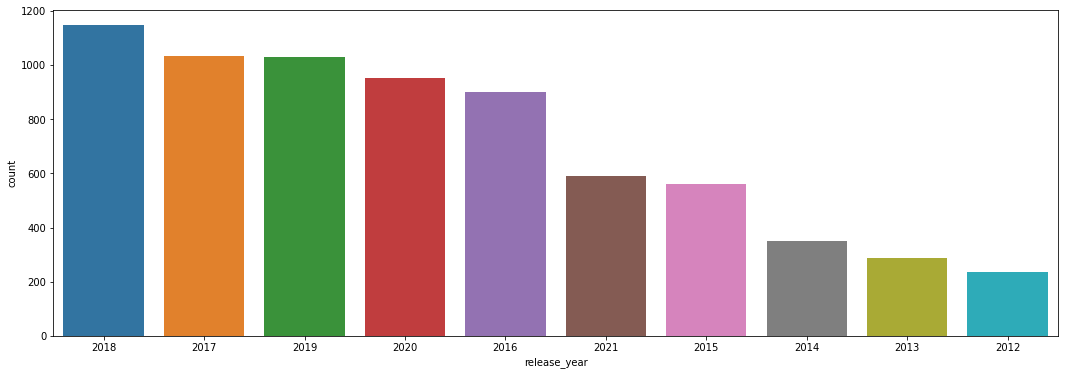

In [489]:
# Top 10 years by no. of movies/tv shows released
fig,ax = plt.subplots(figsize=(18, 6))
# df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_og['release_year'],order=df_og['release_year'].value_counts().iloc[:10].index,ax=ax)
plt.show()

In [490]:
#Making a month column

df_og['Month']=pd.to_datetime(df_og['date_added']).dt.month_name()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


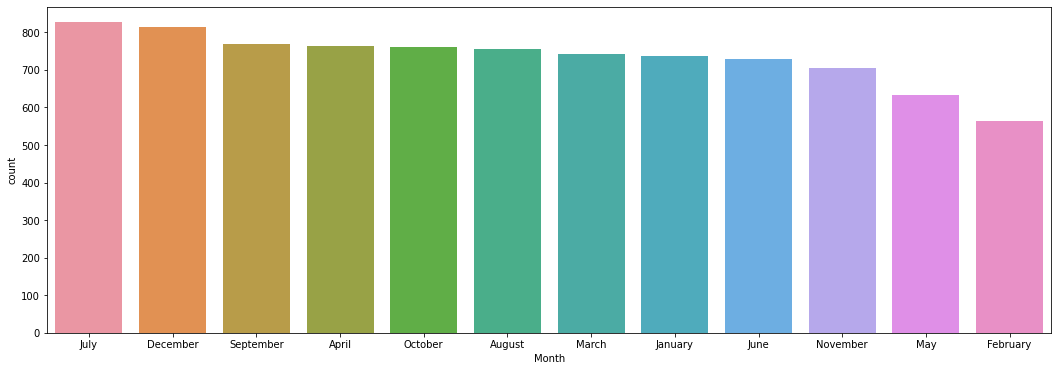

In [491]:
# Most popular months for movies/tv to be added to the platform
#Best months to watch TVs / Movie Shows
fig,ax = plt.subplots(figsize=(18, 6))
# df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_og['Month'],order=df_og['Month'].value_counts().index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


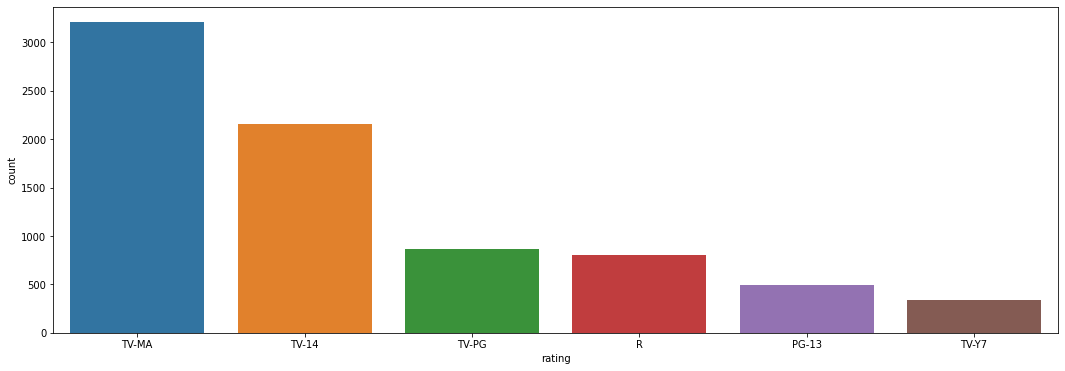

In [492]:
# Most common ratings for movies/tv
fig,ax = plt.subplots(figsize=(18, 6))
# df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_og['rating'],order=df_og['rating'].value_counts().iloc[:6].index,ax=ax)
plt.show()

C:\Users\91991\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


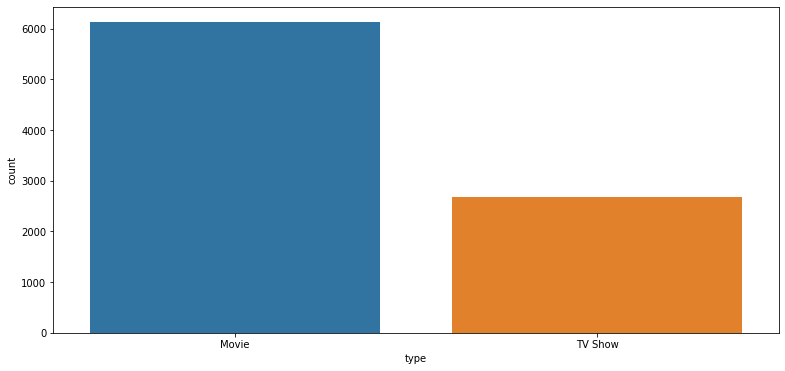

In [493]:
# Movies vs TV shows
fig,ax = plt.subplots(figsize=(13, 6))
# df_country_no_na=df_country.loc[~(df_country['country']=='nan')]
sns.countplot(df_og['type'],order=df_og['type'].value_counts().index,ax=ax)
plt.show()

Bivariate Analysis

In [494]:
df_og.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September


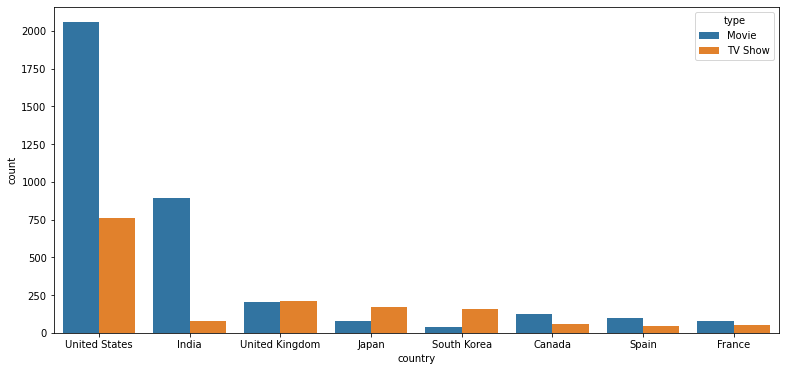

In [495]:
# Movies vs TV shows in different countries
fig,ax = plt.subplots(figsize=(13, 6))
sns.countplot(data=df_og,x='country',hue='type',order=df_og['country'].value_counts().iloc[:8].index,ax=ax)
plt.show()

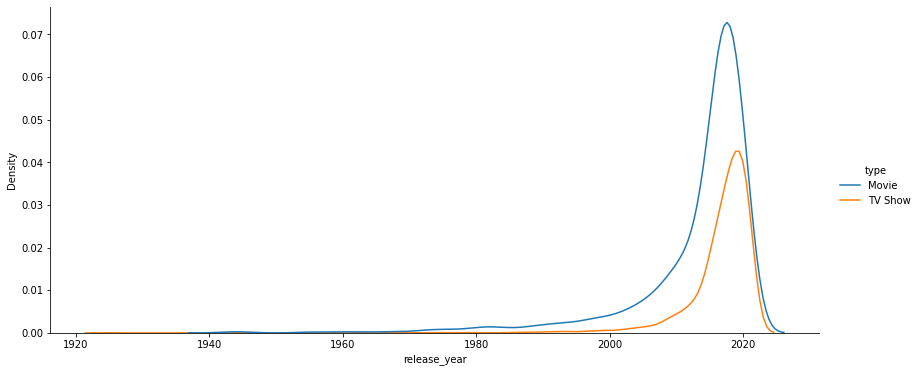

In [496]:
#Trend for movies/tv showes released over the last 20-30 years
sns.displot(data=df_og,x='release_year',hue='type',kind='kde',height=5.27,aspect=11.7/5.27)

In [497]:
df_og

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


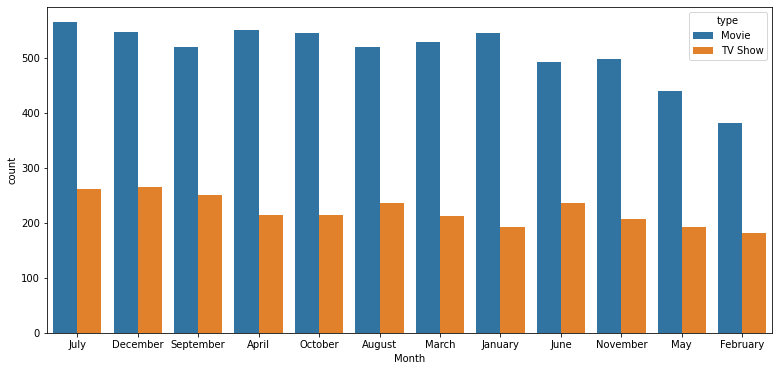

In [498]:
#Best months to watch Movies / TV Shows

fig,ax = plt.subplots(figsize=(13, 6))
sns.countplot(data=df_og,x='Month',hue='type',order=df_og['Month'].value_counts().index,ax=ax)
plt.show()

In [499]:
# Best Actor - Director Combos by no of movies and TV shows made

df_movies=df_1.loc[df_1['type']=='Movie']
df_shows=df_1.loc[df_1['type']=='TV Show']

In [506]:
df_movies['Actor-Director']=df_1.apply(lambda x: x['cast']+'-'+x['director'],axis=1)
df_movies_rel=df_movies.groupby(['Actor-Director'])['title'].nunique().sort_values(ascending=False).reset_index()

C:\Users\91991\AppData\Local\Temp\ipykernel_1652\3872263749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['Actor-Director']=df_1.apply(lambda x: x['cast']+'-'+x['director'],axis=1)


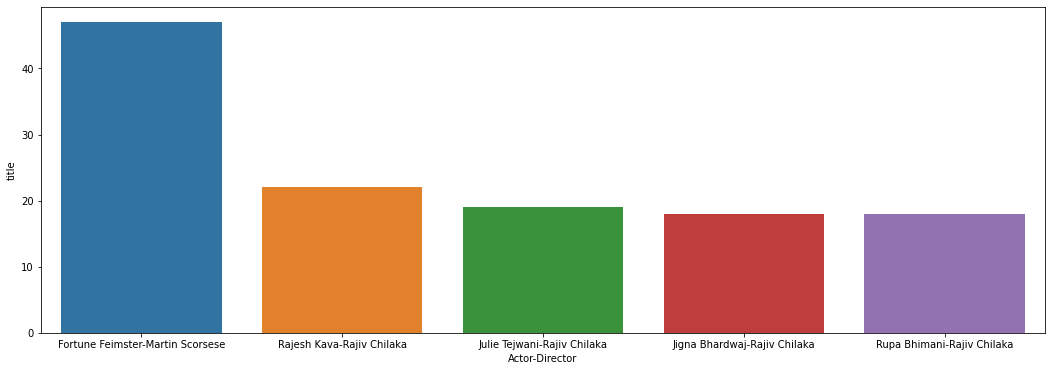

In [507]:
# Best Actor - Director Combos by no of movies made

fig,ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=df_movies_rel.iloc[:5],x='Actor-Director',y=df_movies_rel['title'],ax=ax)
plt.show()

In [502]:
df_shows['Actor-Director']=df_1.apply(lambda x: x['cast']+'-'+x['director'],axis=1)
df_shows_rel=df_shows.groupby(['Actor-Director'])['title'].nunique().sort_values(ascending=False).reset_index()

C:\Users\91991\AppData\Local\Temp\ipykernel_1652\3426713583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['Actor-Director']=df_1.apply(lambda x: x['cast']+'-'+x['director'],axis=1)


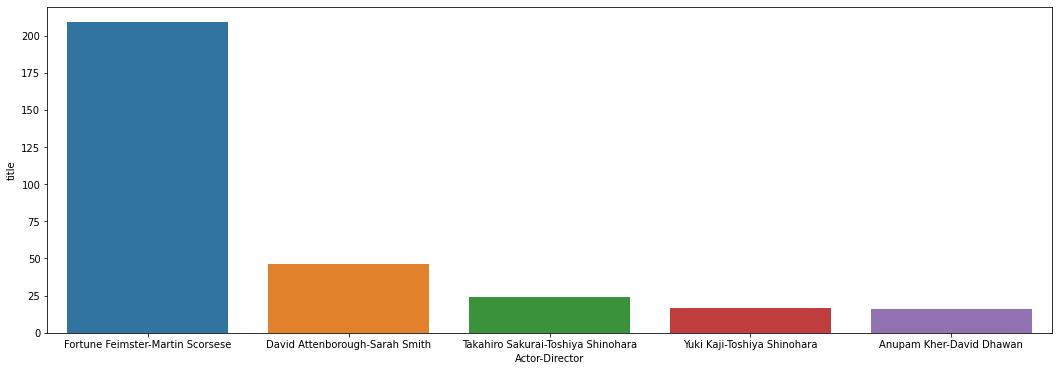

In [505]:
# Best Actor - Director Combos by no of TV Shows made

fig,ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=df_shows_rel.iloc[:5],x='Actor-Director',y=df_shows_rel['title'],ax=ax)
plt.show()

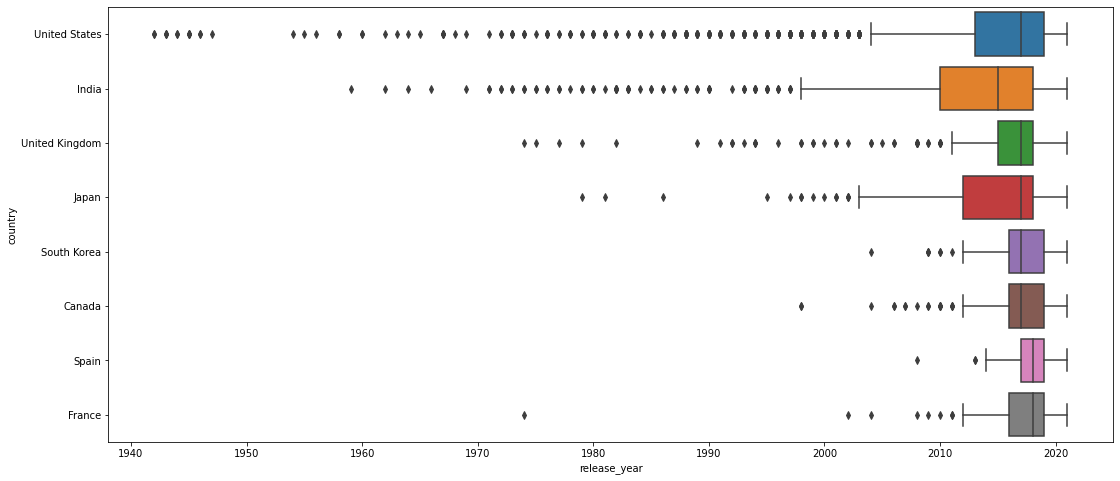

In [517]:
# Movies released by year in different countries
fig,ax = plt.subplots(figsize=(18, 8))
sns.boxplot(data=df_og,x='release_year',y='country',order=df_og['country'].value_counts().iloc[:8].index,ax=ax)
plt.show()